In [1]:
from pandas import Series, DataFrame
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
from pandas import concat
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
import numpy as np
%matplotlib inline

Month
1948-01-01    278
1948-02-01    310
1948-03-01    298
1948-04-01    225
1948-05-01    185
Name: Monthly U.S. male (16-19 years) unemployment figures (thousands) 1948-1981, dtype: int64


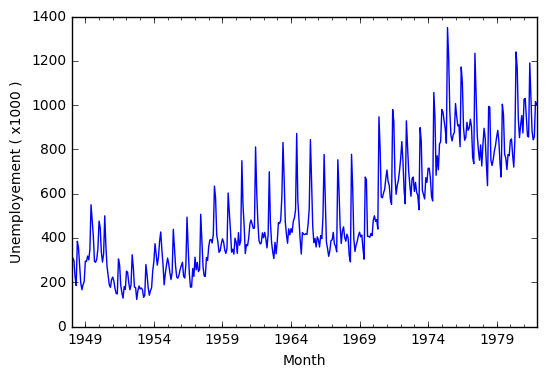

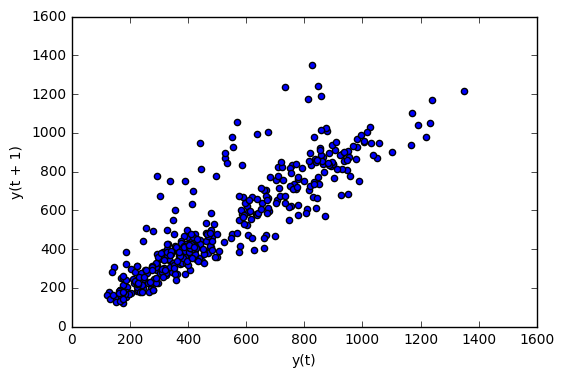

In [2]:
series = Series.from_csv('monthly-us-male-1619-years-unemp.csv', header=0)
print(series.head())
series=series.astype(float)

series.plot()
pyplot.ylabel('Unemployement ( x1000 )')
pyplot.show()

lag_plot(series)
pyplot.show()

In [3]:
values = DataFrame(series.values)
# print(values)
dataframe = concat([values.shift(6),values.shift(5),values.shift(4),values.shift(3),values.shift(2),values.shift(1), values], axis=1)
dataframe.columns = ['t-6','t-5','t-4','t-3','t-2','t-1', 't']
print(dataframe)
result = dataframe.corr()
print(result)

        t-6     t-5     t-4     t-3     t-2     t-1       t
0       NaN     NaN     NaN     NaN     NaN     NaN   278.0
1       NaN     NaN     NaN     NaN     NaN   278.0   310.0
2       NaN     NaN     NaN     NaN   278.0   310.0   298.0
3       NaN     NaN     NaN   278.0   310.0   298.0   225.0
4       NaN     NaN   278.0   310.0   298.0   225.0   185.0
5       NaN   278.0   310.0   298.0   225.0   185.0   385.0
6     278.0   310.0   298.0   225.0   185.0   385.0   356.0
7     310.0   298.0   225.0   185.0   385.0   356.0   274.0
8     298.0   225.0   185.0   385.0   356.0   274.0   197.0
9     225.0   185.0   385.0   356.0   274.0   197.0   166.0
10    185.0   385.0   356.0   274.0   197.0   166.0   189.0
11    385.0   356.0   274.0   197.0   166.0   189.0   203.0
12    356.0   274.0   197.0   166.0   189.0   203.0   295.0
13    274.0   197.0   166.0   189.0   203.0   295.0   294.0
14    197.0   166.0   189.0   203.0   295.0   294.0   318.0
15    166.0   189.0   203.0   295.0   29

predicted=593.267923, expected=594.000000
predicted=548.038299, expected=576.000000
predicted=640.307918, expected=672.000000
predicted=674.948628, expected=651.000000
predicted=597.206064, expected=714.000000
predicted=698.326091, expected=715.000000
predicted=660.581329, expected=672.000000
predicted=638.199828, expected=588.000000
predicted=549.802832, expected=567.000000
predicted=882.635525, expected=1057.000000
predicted=943.263298, expected=949.000000
predicted=720.196790, expected=683.000000
predicted=663.535645, expected=771.000000
predicted=697.576918, expected=708.000000
predicted=782.064210, expected=824.000000
predicted=785.536617, expected=835.000000
predicted=838.887366, expected=980.000000
predicted=919.170457, expected=969.000000
predicted=874.010873, expected=931.000000
predicted=796.910421, expected=892.000000
predicted=815.676924, expected=828.000000
predicted=1234.459692, expected=1350.000000
predicted=1199.525903, expected=1218.000000
predicted=915.330625, expecte

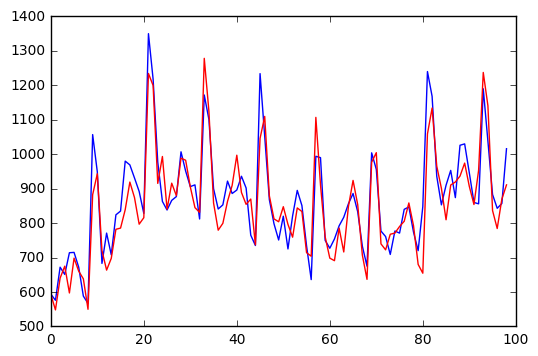

In [4]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('monthly-us-male-1619-years-unemp.csv', header=0)
# split dataset
X = series.values
train, test = X[6:len(X)-100], X[len(X)-100:-1]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

0 , predicted=855.852778, expected=839.000000
1 , predicted=710.509296, expected=614.000000
2 , predicted=597.829507, expected=594.000000
3 , predicted=634.647686, expected=576.000000
4 , predicted=647.679254, expected=672.000000
5 , predicted=695.388897, expected=651.000000
6 , predicted=665.764158, expected=714.000000
7 , predicted=713.997602, expected=715.000000
8 , predicted=671.488349, expected=672.000000
9 , predicted=657.979771, expected=588.000000
10 , predicted=605.293561, expected=567.000000
11 , predicted=625.422954, expected=1057.000000
12 , predicted=974.905473, expected=949.000000
13 , predicted=779.255851, expected=683.000000
14 , predicted=654.861986, expected=771.000000
15 , predicted=787.601836, expected=708.000000
16 , predicted=747.378078, expected=824.000000
17 , predicted=827.388361, expected=835.000000
18 , predicted=824.820187, expected=980.000000
19 , predicted=941.031627, expected=969.000000
20 , predicted=857.983656, expected=931.000000
21 , predicted=886.501

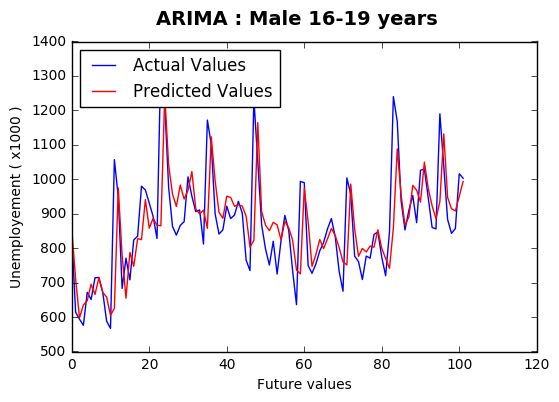

In [7]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

def parser(x):
    return datetime.strptime(x, '%Y-%m')

series = read_csv('monthly-us-male-1619-years-unemp.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#series = (series - series.mean()) #/ (series.max() - series.min())

X = series.values
X = np.asarray(X, dtype=float)
# X = X[6:-1]
# print X
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


for t in range(len(test)):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('%i , predicted=%f, expected=%f' % (t, yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % np.sqrt(error))
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.suptitle('ARIMA : Male 16-19 years', fontsize=14, fontweight='bold')
# pyplot.set_title('ARIMA')

pyplot.ylabel('Unemployement ( x1000 )')
pyplot.xlabel('Future values')

pyplot.legend(['Actual Values', 'Predicted Values'], loc='upper left')
pyplot.show()

(298, 6) (99, 6) (298,) (99,)
121.052994259
265.198183893


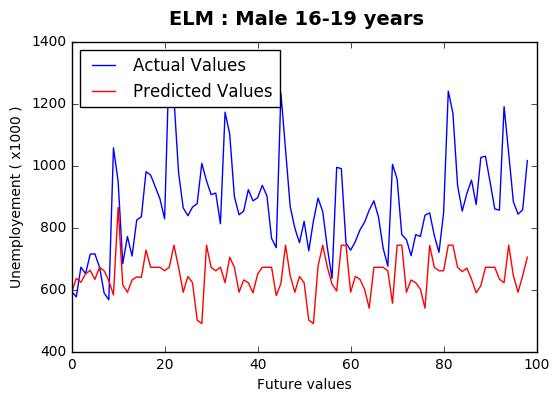

In [15]:
import numpy as np
from pandas import Series, DataFrame
from pandas import datetime
from pandas import read_csv
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
from pandas import concat
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
%matplotlib inline


def parser(x):
    return datetime.strptime(x, '%Y-%m')

series = read_csv('monthly-us-male-1619-years-unemp.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
mean_xyz=series.mean()
series = (series - series.mean()) #/ (series.max() - series.min())

values = DataFrame(series.values)

series=series.astype(float)
# np.random.seed(131237)
np.random.seed(131)


dataframe = concat([values.shift(6),values.shift(5),values.shift(4),values.shift(3),values.shift(2),values.shift(1), values], axis=1)
dataframe.columns = ['t-6','t-5','t-4','t-3','t-2','t-1', 't']
data = np.array(dataframe.values, dtype=float)
data=data[10:]

# print data[0][-1]
# print(data)
X_train=data[:int(data.shape[0]*0.75),:-1]
Y_train=data[:int(data.shape[0]*0.75),-1] 
X_test=data[int(data.shape[0]*0.75):-1,:-1]
Y_test=data[int(data.shape[0]*0.75):-1,-1] 

print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

from hpelm import ELM

elm = ELM(X_train.shape[1], 1)
elm.add_neurons(20, "sigm")
elm.add_neurons(15, "sigm")
elm.add_neurons(5, "sigm")

elm.train(X_train, Y_train, "LOO","OP","r")
# Yunseenpredict = elm.predict(Xunseen)

Y_predict = elm.predict(X_test)
Y_trainpredict = elm.predict(X_train)

print np.sqrt(elm.error(Y_trainpredict,Y_train))
print np.sqrt(elm.error(Y_predict,Y_test))
pyplot.plot(Y_test+mean_xyz)
pyplot.plot(Y_predict+mean_xyz, color='red')
pyplot.suptitle('ELM : Male 16-19 years', fontsize=14, fontweight='bold')
# pyplot.set_title('ARIMA')

pyplot.ylabel('Unemployement ( x1000 )')
pyplot.xlabel('Future values')

pyplot.legend(['Actual Values', 'Predicted Values'], loc='upper left')
pyplot.show()
#     ExtraPolY.append(float(temporary))
#     for j in range(numfeatures-1):
#         ExtraPolX[0,j] = ExtraPolX[0,j+1]
#     ExtraPolX[0,numfeatures-1] = float(temporary)

# ExtraPolY = np.asarray(ExtraPolY)

[ 278.  310.  298.  225.  185.  385.  356.]
(301, 6) (101, 6) (301,) (101,)
104.304436665
141.790012924


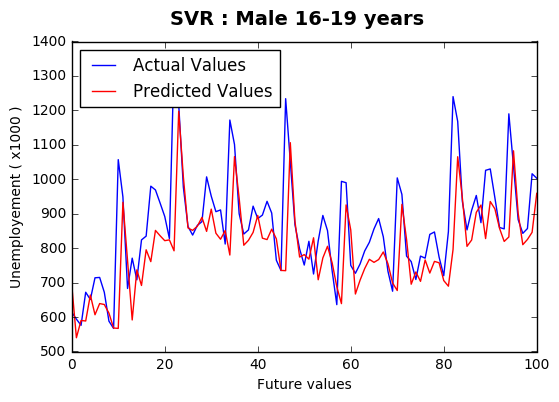

In [11]:
import numpy as np

from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
from pandas import concat
from sklearn.metrics import mean_squared_error
from pandas import Series, DataFrame
series = Series.from_csv('monthly-us-male-1619-years-unemp.csv', header=0)
values = DataFrame(series.values)
series=series.astype(float)
np.random.seed(131237)

# print(values)
dataframe = concat([values.shift(6),values.shift(5),values.shift(4),values.shift(3),values.shift(2),values.shift(1), values], axis=1)
dataframe.columns = ['t-6','t-5','t-4','t-3','t-2','t-1', 't']
data = np.array(dataframe.values)
data=data[6:]

# print data[0][-1]
print(data[0])
X_train=data[:int(data.shape[0]*0.75),:-1]
Y_train=data[:int(data.shape[0]*0.75),-1] 
X_test=data[int(data.shape[0]*0.75):,:-1]
Y_test=data[int(data.shape[0]*0.75):,-1] 

print X_train.shape,X_test.shape, Y_train.shape, Y_test.shape


from sklearn.svm import SVR
model = SVR(
            C=10.0,
            epsilon=0.005,
            kernel='linear',
)
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
Y_trainpredict = model.predict(X_train)

print np.sqrt(mean_squared_error(Y_train,Y_trainpredict))
print np.sqrt(mean_squared_error(Y_test,Y_predict))
pyplot.plot(Y_test)
pyplot.plot(Y_predict, color='red')
pyplot.suptitle('SVR : Male 16-19 years', fontsize=14, fontweight='bold')
# pyplot.set_title('ARIMA')

pyplot.ylabel('Unemployement ( x1000 )')
pyplot.xlabel('Future values')

pyplot.legend(['Actual Values', 'Predicted Values'], loc='upper left')
pyplot.show()
# Yunseenpredict = model.predict(Xunseen)

# ExtraPolX = Xunseen[0,:]
# ExtraPolX = ExtraPolX.reshape(1,numfeatures)
# print ExtraPolX.shape
# ExtraPolY = []
# for i in range(Xunseen.shape[0]):
#     temporary = model.predict(ExtraPolX)
#     ExtraPolY.append(float(temporary))
#     for j in range(numfeatures-1):
#         ExtraPolX[0,j] = ExtraPolX[0,j+1]
#     ExtraPolX[0,numfeatures-1] = float(temporary)

# ExtraPolY = np.asarray(ExtraPolY)

In [26]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('monthly-us-male-1619-years-unemp.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values

print((dataset.dtype))
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset.dtype)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(6, input_shape=(1, look_back), return_sequences=False))
model.add(LSTM(6, input_shape=(1, look_back), return_sequences=False))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
print testPredict.shape, trainY.shape
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = (mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MSE' % (trainScore))
testScore = (mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

int64
float32


ValueError: Input 0 is incompatible with layer lstm_16: expected ndim=3, found ndim=2

[ 310.  298.  225.  185.  385.  356.  274.]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, kernel_initializer="uniform", input_shape=(6,))`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:42: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, kernel_initializer="uniform")`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:46: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


Train on 300 samples, validate on 101 samples
Epoch 1/42
300/300 [==============================] - 0s - loss: 106712.7006 - val_loss: 35939.4086
Epoch 2/42
300/300 [==============================] - 0s - loss: 18214.2525 - val_loss: 18916.7073
Epoch 3/42
300/300 [==============================] - 0s - loss: 18454.1670 - val_loss: 22851.2506
Epoch 4/42
300/300 [==============================] - 0s - loss: 18311.8913 - val_loss: 18320.4868
Epoch 5/42
300/300 [==============================] - 0s - loss: 16101.1738 - val_loss: 21569.7540
Epoch 6/42
300/300 [==============================] - 0s - loss: 17495.1846 - val_loss: 20054.5485
Epoch 7/42
300/300 [==============================] - 0s

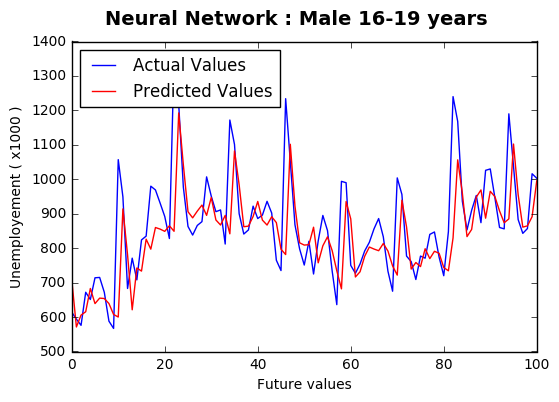

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from pandas import concat
from pandas import Series, DataFrame
from pandas import read_csv
from pandas import datetime
import numpy as np
import numpy as np

from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
def parser(x):
    return datetime.strptime(x, '%Y-%m')

series = read_csv('monthly-us-male-1619-years-unemp.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# series = (series - series.mean()) #/ (series.max() - series.min())

values = DataFrame(series.values)

series=series.astype(float)
np.random.seed(131237)

# print(values)
dataframe = concat([values.shift(6),values.shift(5),values.shift(4),values.shift(3),values.shift(2),values.shift(1), values], axis=1)
dataframe.columns = ['t-6','t-5','t-4','t-3','t-2','t-1', 't']
data = np.array(dataframe.values)
data=data[7:]

# print data[0][-1]
print(data[0])
X_train=data[:int(data.shape[0]*0.75),:-1]
Y_train=data[:int(data.shape[0]*0.75),-1] 
X_test=data[int(data.shape[0]*0.75):,:-1]
Y_test=data[int(data.shape[0]*0.75):,-1] 


model = Sequential()
# 2 inputs, 10 neurons in 1 hidden layer, with tanh activation and dropout
model.add(Dense(128, init='uniform', input_shape=(X_train.shape[1],))) 
model.add(Activation('relu'))

model.add(Dense(32, init='uniform')) 
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 1 output, linear activation
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.fit(X_train, Y_train,
          nb_epoch=42, batch_size=10,
          validation_data=(X_test, Y_test))
Y_predict = model.predict(X_test)
Y_trainpredict = model.predict(X_train)

print np.sqrt(mean_squared_error(Y_train,Y_trainpredict))
print np.sqrt(mean_squared_error(Y_test,Y_predict))
pyplot.plot(Y_test)
pyplot.plot(Y_predict, color='red')
pyplot.suptitle('Neural Network : Male 16-19 years', fontsize=14, fontweight='bold')
# pyplot.set_title('ARIMA')

pyplot.ylabel('Unemployement ( x1000 )')
pyplot.xlabel('Future values')

pyplot.legend(['Actual Values', 'Predicted Values'], loc='upper left')
pyplot.show()